In [9]:
import os
import numpy as np
import pandas as pd
import napari
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
results_dir = r'D:\data_analysis\Betsy_Suraj\230112_Tcell_analysis\results'

In [27]:
df_names_list = [x for x in os.listdir(results_dir) if not('all.pkl' in x)]
df_names_list

['T3737_9_2_R000.pkl',
 'T3737_9_2_R001.pkl',
 'T3737_9_2_R002.pkl',
 'T3737_9_2_R003.pkl',
 'T3737_9_2_R004.pkl',
 'T3737_9_2_R005.pkl',
 'T3737_9_2_R006.pkl',
 'T3737_9_2_R007.pkl',
 'T3937_39_R000.pkl',
 'T3937_39_R001.pkl',
 'T3937_39_R002.pkl',
 'T3937_39_R003.pkl',
 'T3937_39_R004.pkl',
 'T3937_39_R005.pkl',
 'T3937_39_R006.pkl',
 'T3937_39_R007.pkl']

In [28]:
df_list = []

for df_name in df_names_list:

    df_temp = pd.read_pickle(os.path.join(results_dir,df_name))

    df_temp['exp'] = df_name[:-4]

    df_list.append(df_temp)

df = pd.concat(df_list,ignore_index=True)

In [29]:
df

,label,centroid-0_nuc,centroid-1_nuc,bbox-0_nuc,bbox-1_nuc,bbox-2_nuc,bbox-3_nuc,area_nuc,solidity_nuc,eccentricity_nuc,...,pERK_mean_bck,pRB_mean_bck,pS6_mean_bck,exp,exp_dir,slide,well,density,donor,treatment
0,1,19.985955,3476.112360,12,3465,30,3488,356,0.975342,0.621390,...,93.882796,96.161290,116.755376,T3737_9_2_R000,D:\data\T3737_9_2_Final,T3737_9_2,R000,150,D1,0_plated
1,2,46.857494,5033.238329,35,5023,59,5045,407,0.971360,0.425294,...,92.642225,94.078382,106.219132,T3737_9_2_R000,D:\data\T3737_9_2_Final,T3737_9_2,R000,150,D1,0_plated
2,3,49.582150,2576.612576,37,2565,64,2589,493,0.970472,0.553273,...,96.511296,95.954818,212.622407,T3737_9_2_R000,D:\data\T3737_9_2_Final,T3737_9_2,R000,150,D1,0_plated
3,4,50.683215,2789.174941,40,2777,63,2802,423,0.961364,0.379106,...,94.135242,95.403459,202.957471,T3737_9_2_R000,D:\data\T3737_9_2_Final,T3737_9_2,R000,150,D1,0_plated
4,5,52.881481,2551.365432,42,2540,65,2563,405,0.966587,0.220320,...,95.740597,95.519239,213.392564,T3737_9_2_R000,D:\data\T3737_9_2_Final,T3737_9_2,R000,150,D1,0_plated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209567,3654,16739.527108,12331.358434,16730,12322,16751,12342,332,0.956772,0.422338,...,99.221604,100.451112,99.261710,T3937_39_R007,D:\data\T3937_39_Final,T3937_39,R007,200,D2,24_stim
209568,3655,16751.907303,1682.120787,16742,1671,16763,1694,356,0.959569,0.500950,...,98.266705,98.766848,112.366791,T3937_39_R007,D:\data\T3937_39_Final,T3937_39,R007,200,D2,24_stim
209569,3656,16752.072414,11371.106897,16743,11362,16763,11381,290,0.963455,0.520576,...,99.442185,99.613354,101.387557,T3937_39_R007,D:\data\T3937_39_Final,T3937_39,R007,200,D2,24_stim
209570,3657,16758.314189,5230.631757,16748,5222,16769,5241,296,0.951768,0.541446,...,99.662993,100.326276,101.559745,T3937_39_R007,D:\data\T3937_39_Final,T3937_39,R007,200,D2,24_stim


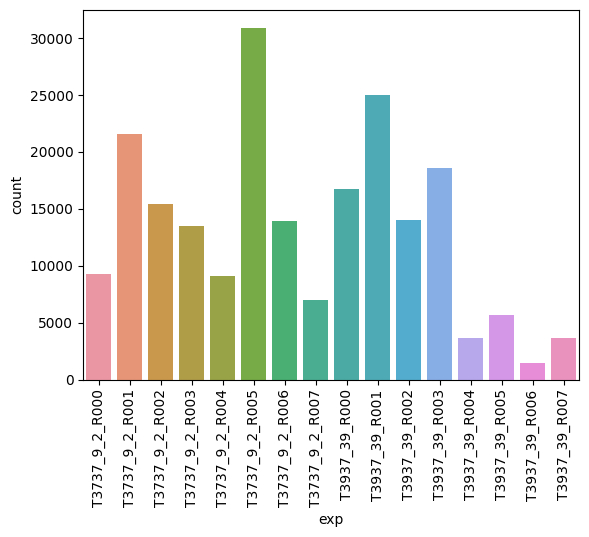

In [30]:
sns.countplot(data=df,x='exp')
t= plt.xticks(rotation = 90)

In [74]:
df_sum = df.loc[:,['label','exp']].groupby('exp').count()
df_sum.columns=['cell_count']
df_sum.reset_index(inplace=True)
df_sum = pd.merge(left=df_sum,right = df.loc[:,['exp','donor','density']],on='exp',how='inner')
df_sum.drop_duplicates(inplace=True)


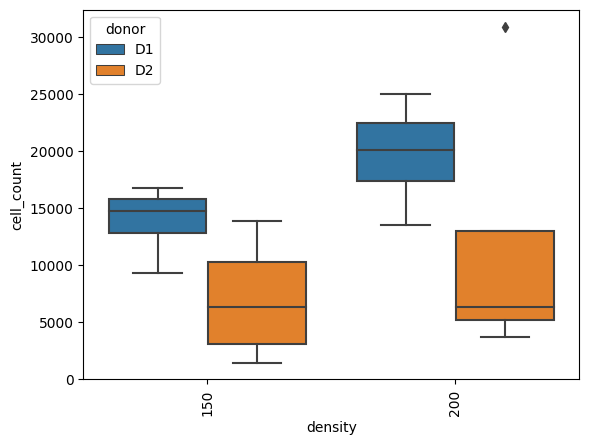

In [49]:
sns.boxplot(data=df_sum,x='density',y='cell_count',hue='donor')
t= plt.xticks(rotation = 90)

<AxesSubplot: xlabel='treatment', ylabel='area_cell'>

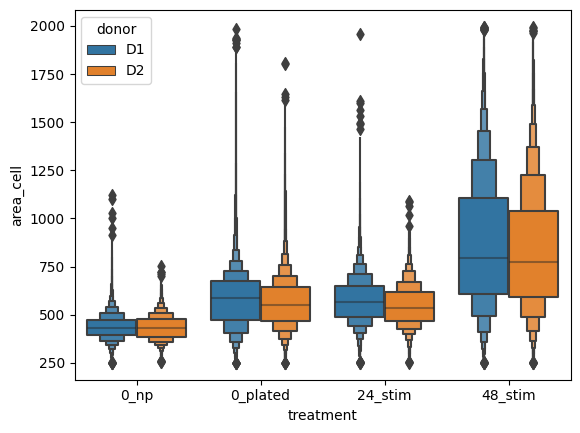

In [55]:
sns.boxenplot(data=df,x='treatment',y='area_cell',hue='donor',order=['0_np','0_plated','24_stim','48_stim'])

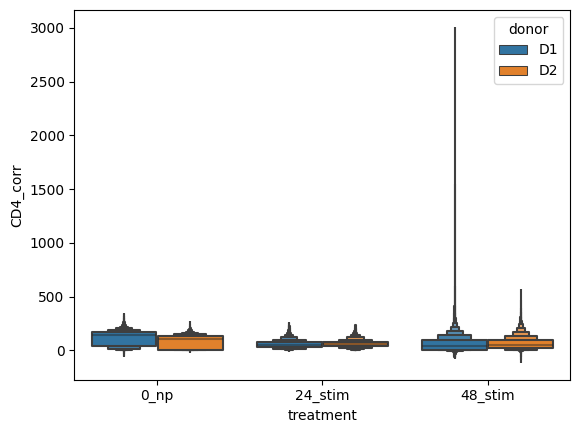

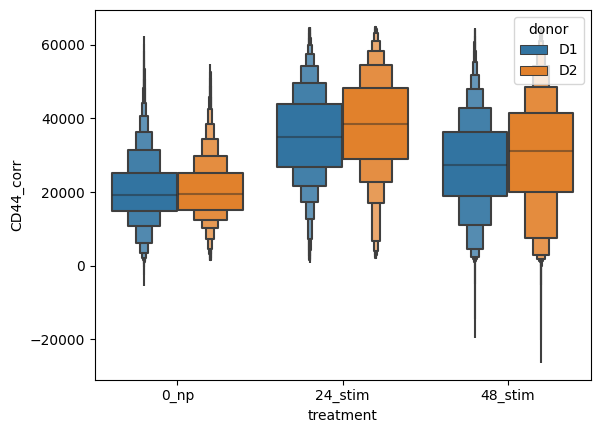

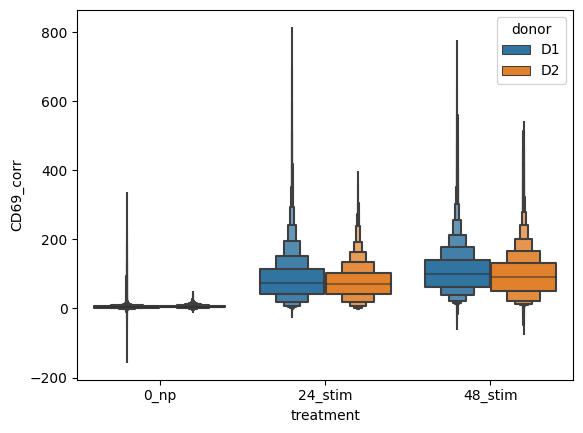

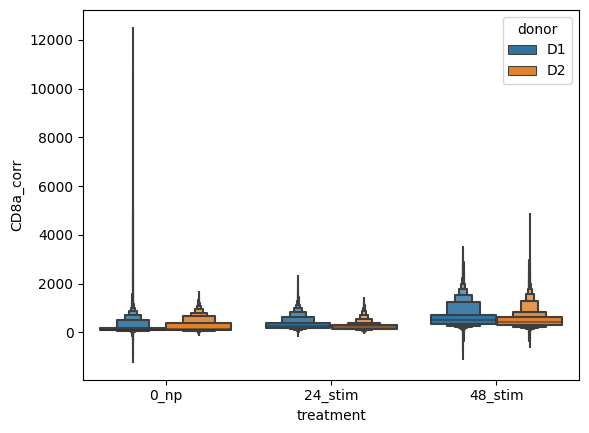

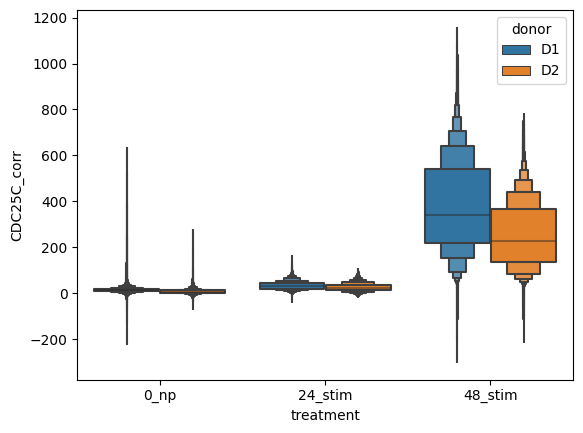

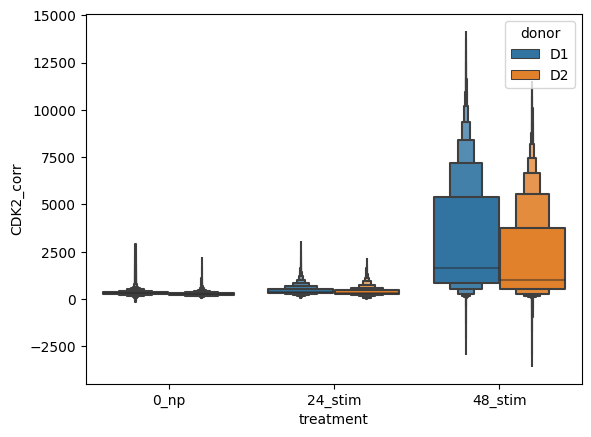

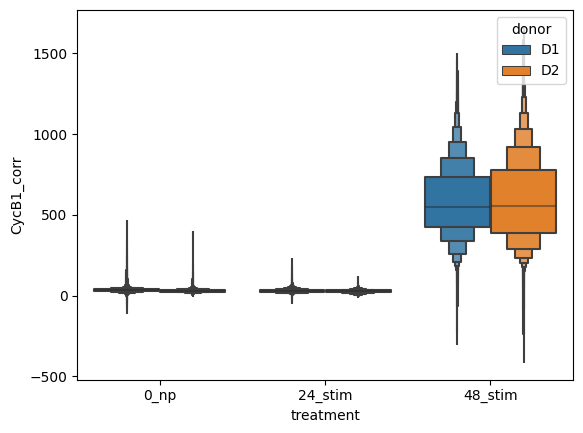

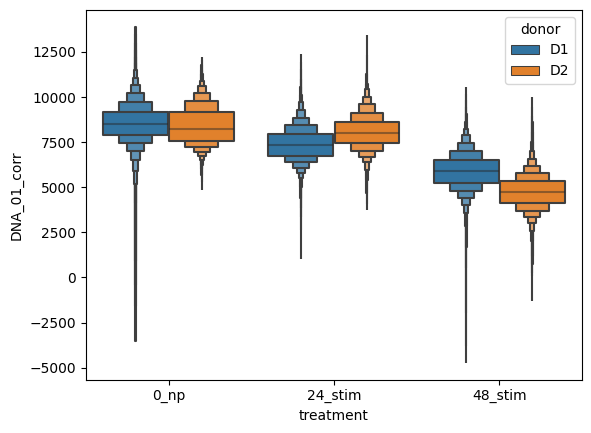

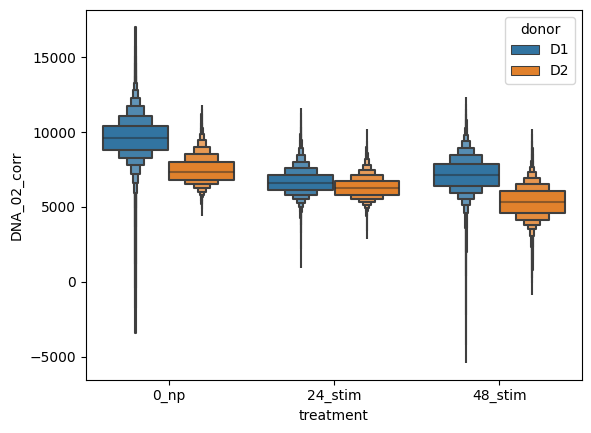

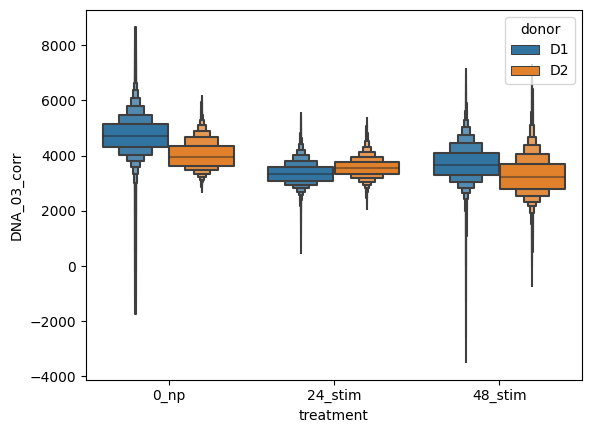

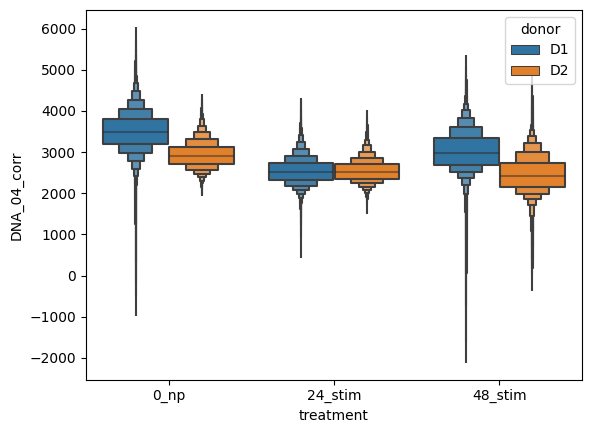

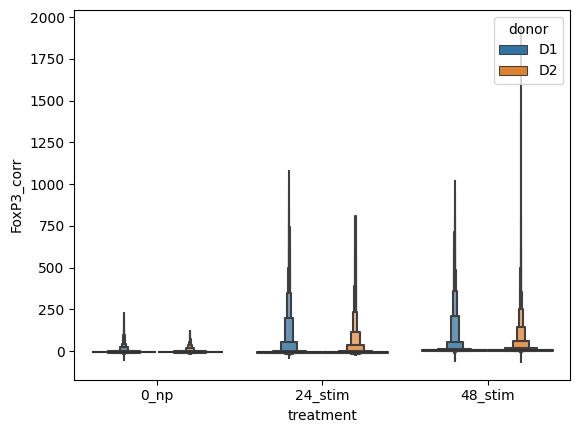

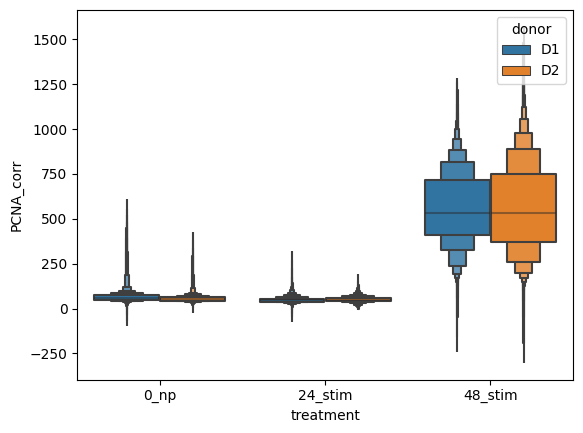

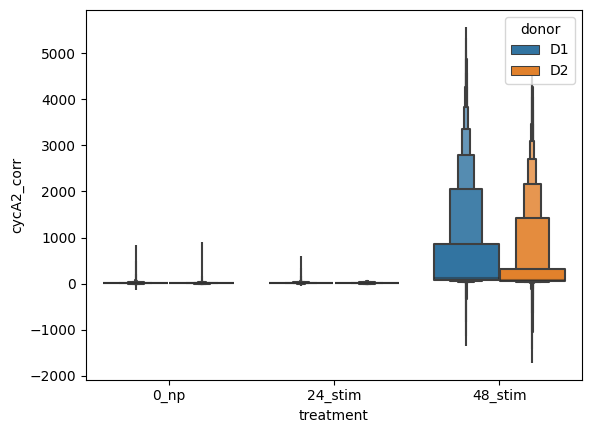

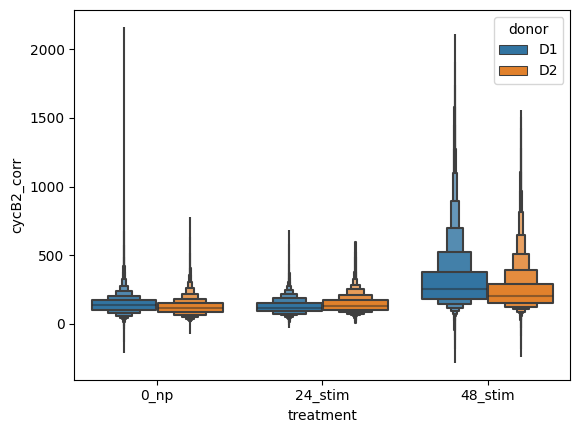

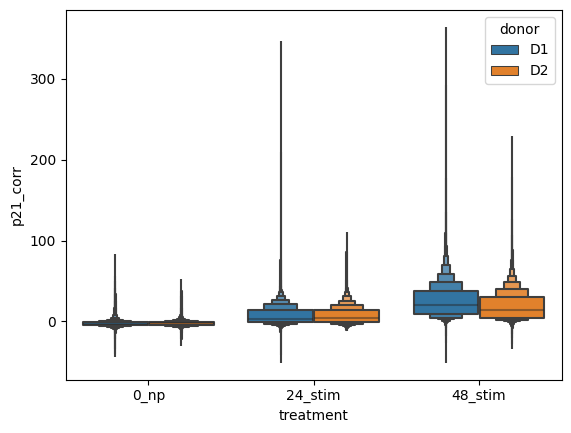

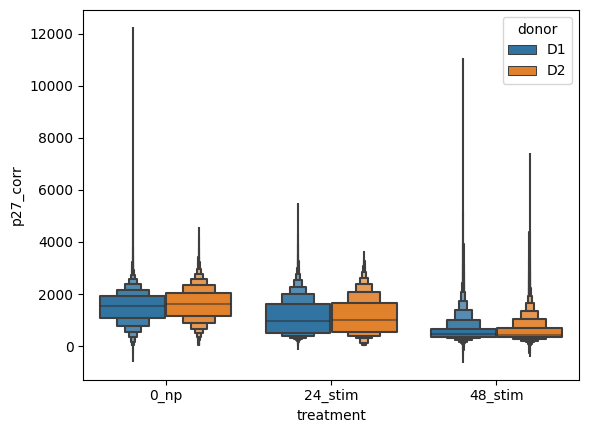

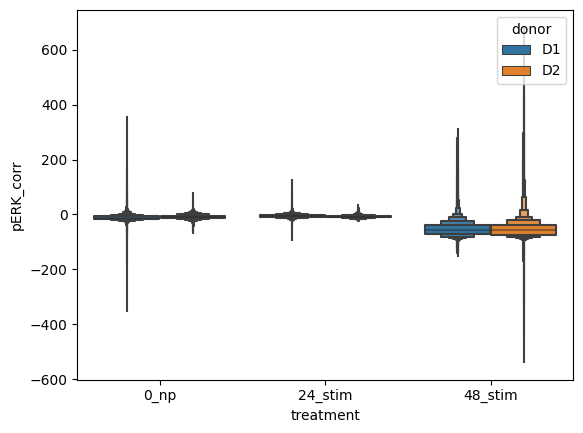

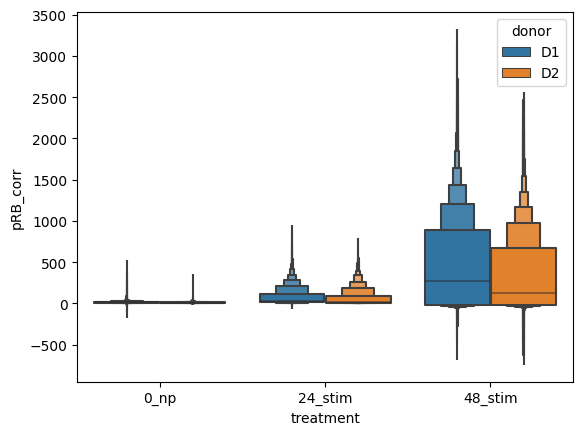

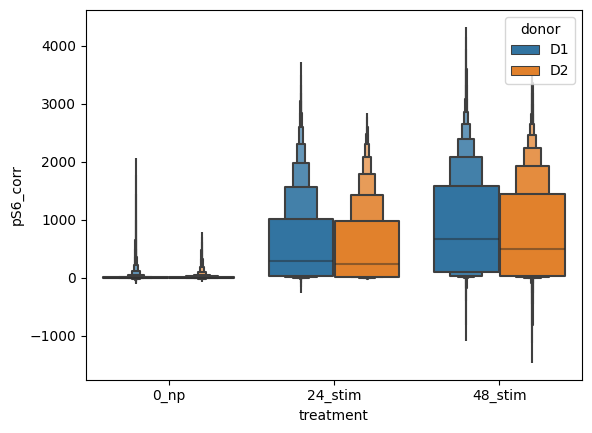

In [115]:
marker_list = ['_'.join(x.split('_')[:-2]) for x in df.columns if 'mean_nuc' in x]

for sel_marker in marker_list:

    df[f'{sel_marker}_corr'] = df[f'{sel_marker}_mean_nuc'] -  df[f'{sel_marker}_mean_bck']

    fig,ax = plt.subplots(1)

    sns.boxenplot(data=df,x='treatment',y=f'{sel_marker}_corr',hue='donor',order=['0_np','24_stim','48_stim'],showfliers=False)

    plt.show()

In [116]:
!jupyter nbconvert --to webpdf --no-input 05_quantify_experiment.ipynb

[NbConvertApp] Converting notebook 05_quantify_experiment.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 644087 bytes to 05_quantify_experiment.pdf


(-100.0, 5000.0)

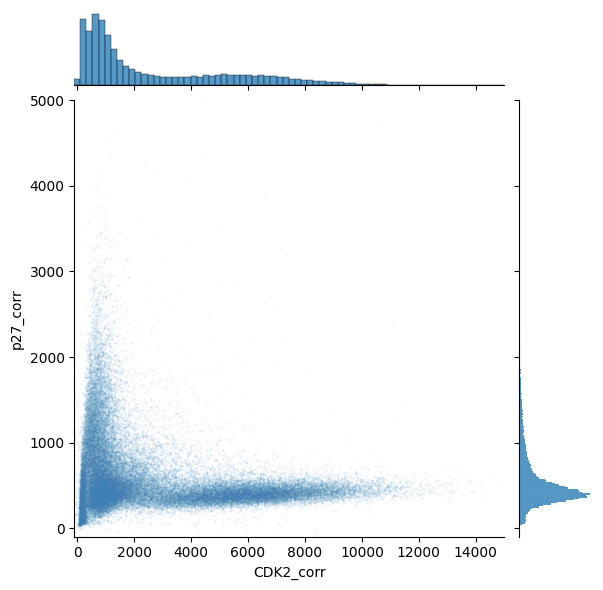

In [99]:
sns.jointplot(data=df.loc[df.treatment=='48_stim',:],x='CDK2_corr',y='p27_corr',alpha=0.1,s=2)
plt.xlim([-100,15000])
plt.ylim([-100,5000])

(-100.0, 2000.0)

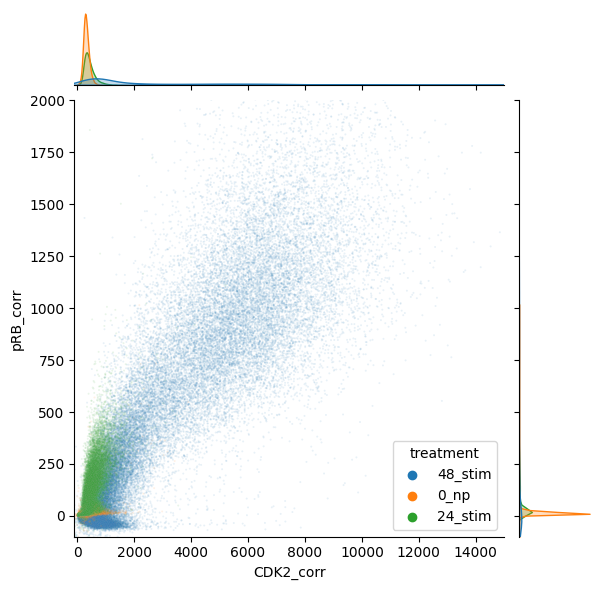

In [138]:
sns.jointplot(data=df.loc[((df.treatment=='24_stim') | (df.treatment=='48_stim') | (df.treatment=='0_np')),:],x='CDK2_corr',y='pRB_corr',alpha=0.1,s=2,hue='treatment')
plt.xlim([-100,15000])
plt.ylim([-100,2000])

(-100.0, 5000.0)

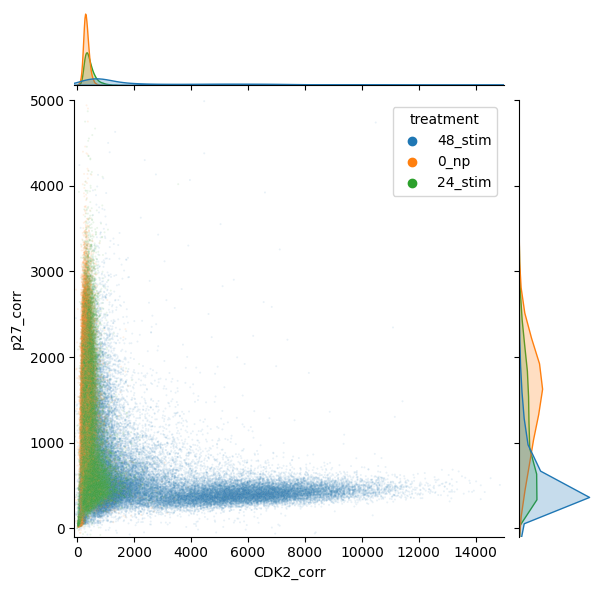

In [117]:
sns.jointplot(data=df.loc[((df.treatment=='24_stim') | (df.treatment=='0_np') | (df.treatment=='48_stim')),:],x='CDK2_corr',y='p27_corr',alpha=0.1,s=2,hue='treatment')
plt.xlim([-100,15000])
plt.ylim([-100,5000])

(-100.0, 17000.0)

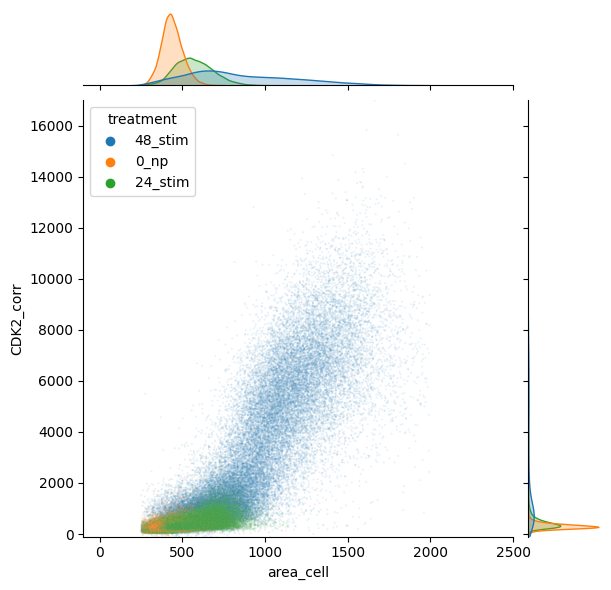

In [128]:
sns.jointplot(data=df.loc[((df.treatment=='0_np') | (df.treatment=='24_stim') | (df.treatment=='48_stim')),:],x='area_cell',y='CDK2_corr',alpha=0.1,s=2,hue='treatment')
plt.xlim([-100,2500])
plt.ylim([-100,17000])

In [131]:
[x for x in df.columns if 'nuc' in x]

['centroid-0_nuc',
 'centroid-1_nuc',
 'bbox-0_nuc',
 'bbox-1_nuc',
 'bbox-2_nuc',
 'bbox-3_nuc',
 'area_nuc',
 'solidity_nuc',
 'eccentricity_nuc',
 'CD4_mean_nuc',
 'CD44_mean_nuc',
 'CD69_mean_nuc',
 'CD8a_mean_nuc',
 'CDC25C_mean_nuc',
 'CDK2_mean_nuc',
 'CycB1_mean_nuc',
 'DNA_01_mean_nuc',
 'DNA_02_mean_nuc',
 'DNA_03_mean_nuc',
 'DNA_04_mean_nuc',
 'FoxP3_mean_nuc',
 'PCNA_mean_nuc',
 'cycA2_mean_nuc',
 'cycB2_mean_nuc',
 'p21_mean_nuc',
 'p27_mean_nuc',
 'pERK_mean_nuc',
 'pRB_mean_nuc',
 'pS6_mean_nuc']

In [134]:
df['DNA_tot'] = (df['DNA_04_mean_nuc'] - df['DNA_04_mean_bck'])*df['area_nuc']

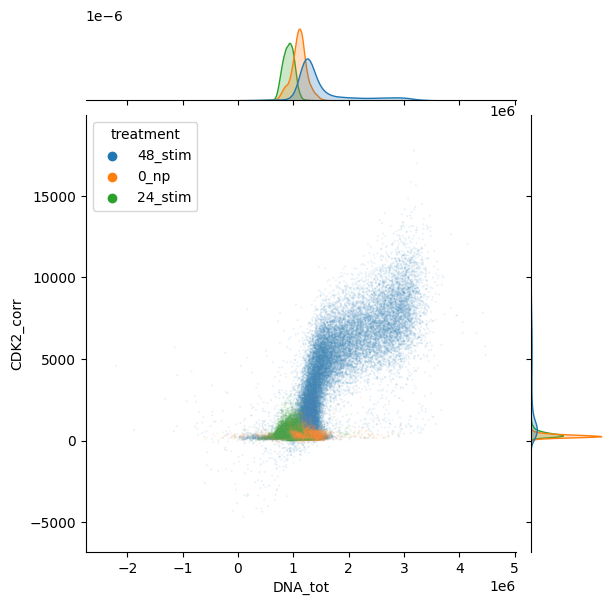

In [136]:
sns.jointplot(data=df.loc[((df.treatment=='0_np') | (df.treatment=='24_stim') | (df.treatment=='48_stim')),:],x='DNA_tot',y='CDK2_corr',alpha=0.1,s=2,hue='treatment')

(-100.0, 1000.0)

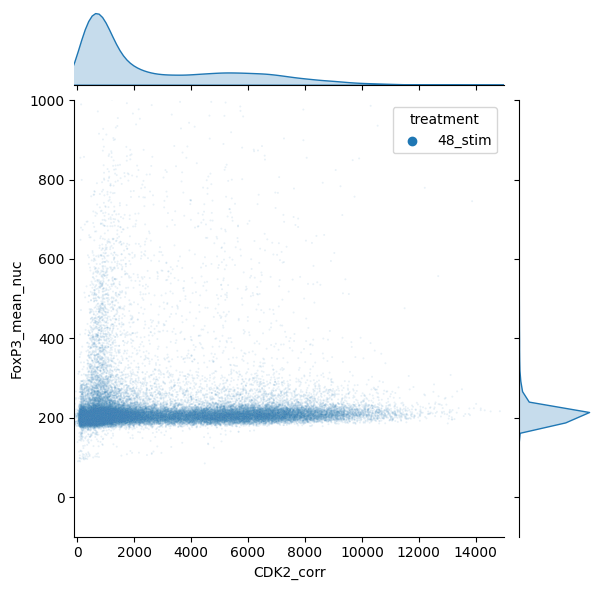

In [140]:
sns.jointplot(data=df.loc[((df.treatment=='48_stim')),:],y='FoxP3_mean_nuc',x='CDK2_corr',alpha=0.1,s=2,hue='treatment') #(df.treatment=='0_np') | (df.treatment=='24_stim') | 
plt.xlim([-100,15000])
plt.ylim([-100,1000])

(-100.0, 4000.0)

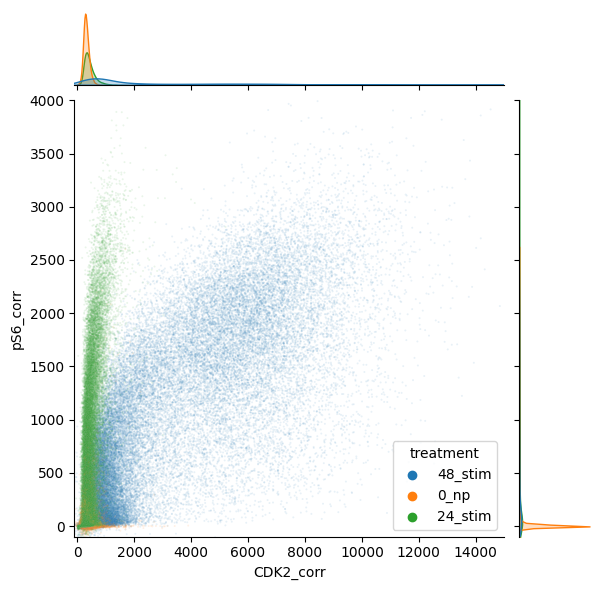

In [143]:
sns.jointplot(data=df.loc[((df.treatment=='0_np') | (df.treatment=='24_stim') | (df.treatment=='48_stim')),:],y='pS6_corr',x='CDK2_corr',alpha=0.1,s=2,hue='treatment')
plt.xlim([-100,15000])
plt.ylim([-100,4000])

(-100.0, 2000.0)

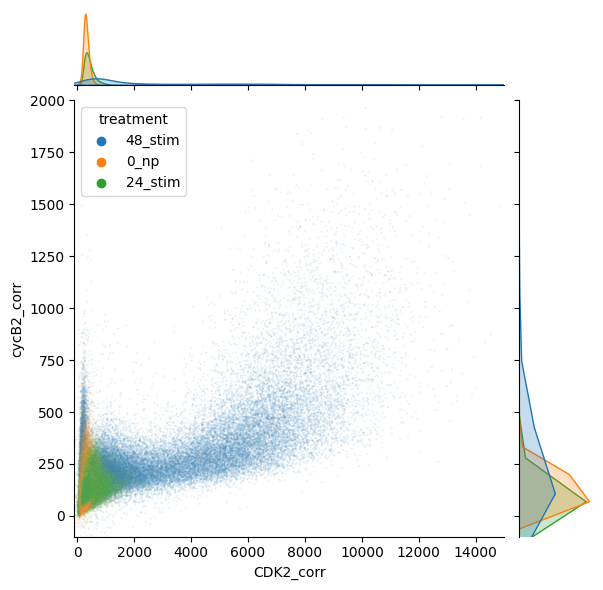

In [154]:
sns.jointplot(data=df.loc[((df.treatment=='0_np') | (df.treatment=='24_stim') | (df.treatment=='48_stim')),:],y='cycB2_corr',x='CDK2_corr',alpha=0.1,s=2,hue='treatment')
plt.xlim([-100,15000])
plt.ylim([-100,2000])

(-100.0, 2000.0)

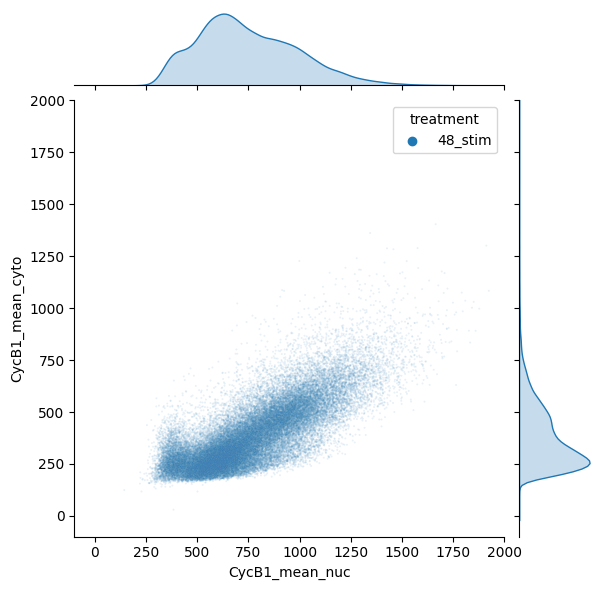

In [152]:
sns.jointplot(data=df.loc[((df.treatment=='48_stim')),:],y='CycB1_mean_cyto',x='CycB1_mean_nuc',alpha=0.1,s=2,hue='treatment')
plt.xlim([-100,2000])
plt.ylim([-100,2000])